Problem : Which promotion was the most effective?

Scenario : 
Rantai restoran makanan cepat saji berencana untuk menambahkan menu baru. Namun, mereka masih ragu tentang tiga kampanye pemasaran yang mungkin untuk mempromosikan produk baru tersebut. Untuk mengetahui promosi mana yang paling efektif dalam meningkatkan penjualan, produk baru akan diperkenalkan di beberapa pasar yang dipilih secara acak. Setiap pasar akan menggunakan promosi yang berbeda, dan penjualan produk baru tersebut akan dicatat setiap minggunya selama empat minggu pertama.

Description of the dataset : 
1. MarketID          : an inhouse tag used to describe market type, we won't be using it.
2. MarketSize        : there are thhree types of market size : small, medium and large.
3. AgeOfStores       : Age of store in years (1-28). The mean age of store is 8.5 years.
4. LocationID        : Unique identifier for store location. Each location identified by number. The total number is 137.
5. Promotion         : One of three promotions that were tested (1,2,3). We don't really know the specifics of each promotion.
6. Week              : One of weeks when the promotions were run (1-4)
7. SalesInThousands  : Sales amount for a specific Location ID, promotion and week. The mean amount od sales ate 53.5 thousand dollars.




1. MarketID          : Sebuah tag internal yang digunakan untuk menggambarkan jenis pasar, kami tidak akan menggunakannya.
2. MarketSize        : Ada tiga jenis ukuran pasar: kecil, sedang, dan besar.
3. AgeOfStores       : Usia toko dalam tahun (1-28). Rata-rata usia toko adalah 8.5 tahun.
4. LocationID        : Pengenal unik untuk lokasi toko. Setiap lokasi diidentifikasi dengan nomor. Totalnya adalah 137.
5. Promotion         : Salah satu dari tiga promosi yang diuji (1,2,3). Kami tidak benar-benar mengetahui detail dari setiap promosi.
6. Week              : Salah satu minggu ketika promosi dijalankan (1-4).
7. SalesInThousands  : Jumlah penjualan untuk Lokasi ID, promosi, dan minggu tertentu. Rata-rata jumlah penjualan adalah 53.5 ribu dolar.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = '/kaggle/input/marketing/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv'
df = pd.read_csv(file_name)

df.head(25)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


In [2]:
print('Raw        : ',df.shape[0])
print('Columns    : ', df.shape[1])
print('\nFeatures   : \n', df.columns.tolist())
print('\nMissing Values : \n', df.isnull().sum())
print('\nUnique Value   : \n', df.nunique())

Raw        :  548
Columns    :  7

Features   : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing Values : 
 MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Unique Value   : 
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [3]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


EDA

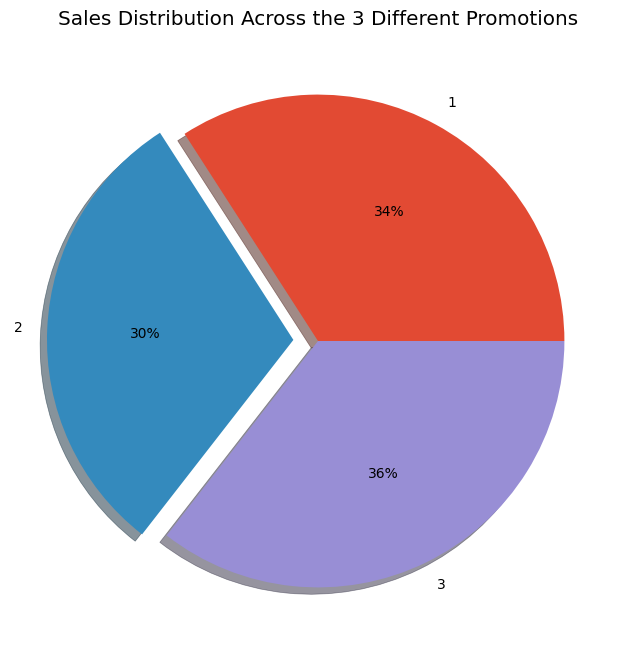

In [4]:
plt.style.use('ggplot')

ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize = (8,8),
                                                               autopct='%1.0f%%',
                                                               shadow=True,
                                                               explode = (0,0.1,0))

ax.set_ylabel('')
ax.set_title('Sales Distribution Across the 3 Different Promotions')

plt.show()

In [5]:
# Now we view tge promotions in each market size
df.groupby(['Promotion','MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

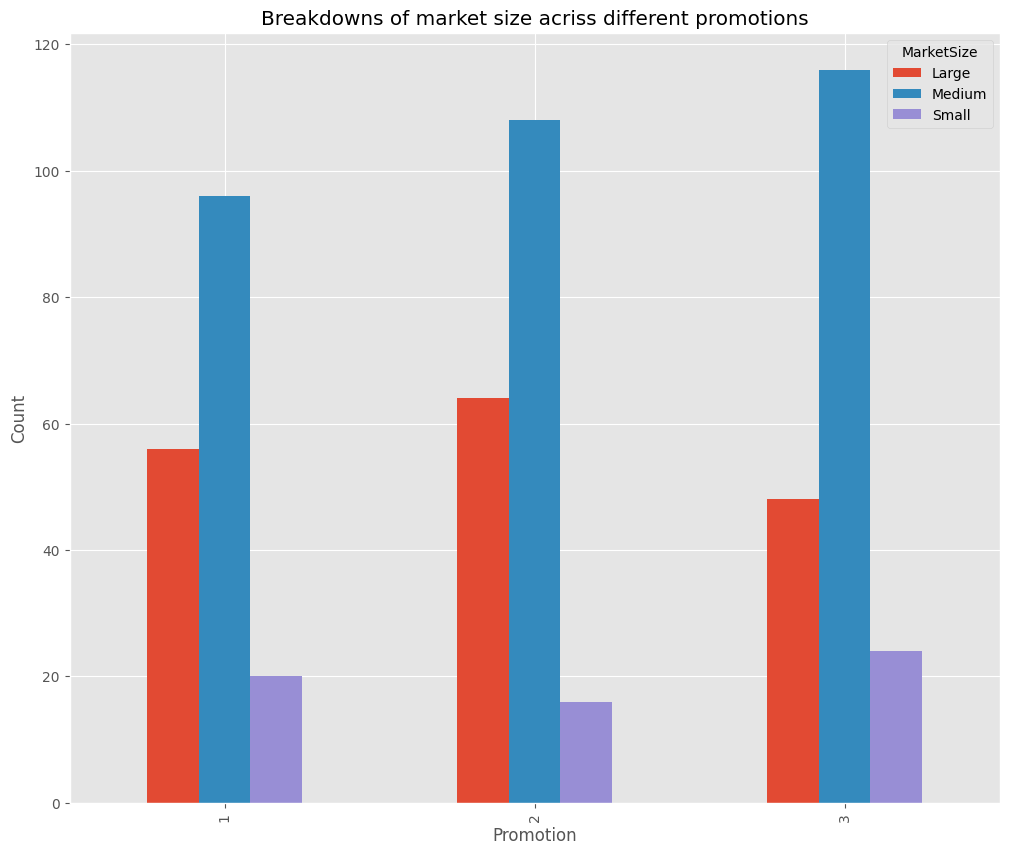

In [6]:
# Put this into plot

ax = df.groupby(['Promotion','MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
kind='bar',
figsize= (12,10),
grid=True)


ax.set_ylabel('Count')
ax.set_title('Breakdowns of market size acriss different promotions')

plt.show()